# Sensitivity analysis for Bayesian networks using credal networks

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.sideBySide(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

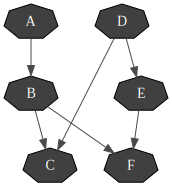


A:Range([0,1])
<> : [[0.220169 , 0.779831] , [0.207866 , 0.792134]]

B:Range([0,1])
<A:0> : [[0.660016 , 0.339984] , [0.660008 , 0.339992]]
<A:1> : [[0.850764 , 0.149235]]

C:Range([0,1])
<B:0|D:0> : [[0.630181 , 0.369819] , [0.630168 , 0.369832]]
<B:1|D:0> : [[0.412837 , 0.587163] , [0.412486 , 0.587514]]
<B:0|D:1> : [[0.246694 , 0.753306] , [0.0620761 , 0.937924]]
<B:1|D:1> : [[0.610874 , 0.389126] , [0.610857 , 0.389143]]

D:Range([0,1])
<> : [[0.990901 , 0.00909879]]

E:Range([0,1])
<D:0> : [[0.205146 , 0.794854] , [0.187125 , 0.812875]]
<D:1> : [[0.45264 , 0.54736] , [0.452455 , 0.547545]]

F:Range([0,1])
<E:0|B:0> : [[0.278478 , 0.721522] , [0.274813 , 0.725187]]
<E:1|B:0> : [[0.544728 , 0.455272] , [0.544683 , 0.455317]]
<E:0|B:1> : [[0.223671 , 0.776329] , [0.0726329 , 0.927367]]
<E:1|B:1> : [[0.539425 , 0.460575] , [0.539376 , 0.460624]]




In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)

## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [4]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return f"<center><b>noise={beta}</b></center><br>{gnb.getInference(cr,engine=ielbp)}"

In [5]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add_html(showNoisy(bn,eps))
gnb.flow.display()